# Play the dungeon MDP

In [1]:
import sys
sys.path.append('../mdp/')
from dungeon import DungeonMDP
import numpy as np
from IPython.display import clear_output, display, HTML

In [2]:
mdp = DungeonMDP()

In [3]:
R = 0
current_room = list(mdp.start())[0]
options = mdp.actions(current_room)
messages = {
    'E': '<h2>You are in an empty room. There are 2 doors.</h2>',
    'M': '<h2>O God, you meet a monster! Your gold has been stolen!</h2',
    'T': '<h2>There is a treasure! Very good...</h2>',
    'O': '<h2>The exit finally!</h2>'
}

exit = False

while not exit:
    display(HTML(messages[current_room]))
    display(HTML('<h3>Your reward for this exploration is <span style="color: #FF0000;">{}</span></h3>'.format(R)))
    
    choice = input('Choose between these possible actions {}\n\n'.format(options))
    if choice.upper() in options and current_room != 'O':
        action = choice.upper()
        next_stages = mdp.successors(current_room, action)
        next_rooms = [s_prime for s_prime, p, r in next_stages]
        p = [p for s_prime, p, r in next_stages]
        next_room = np.random.choice(next_rooms, p=p)
        reward = mdp.reward(current_room, action, next_room)
        current_room = next_room
        R += reward
    else:
        display(HTML('<h1>Game is finished. Your total reward is {}</h1>'.format(R)))
        exit = True
    clear_output(wait=True)

Choose between these possible actions {'R', 'L'}

quit


## Q-learning

In [4]:
from algorithms import Qlearning
from utils import show_q_learning, plot_algorithms
import pandas as pd

In [5]:
Q, history, rewards = Qlearning(mdp, num_episodes=2000)

In [6]:
pd.DataFrame(Q).T

,R,L
T,-1.574361,0.701873
O,0.000000,0.000000
M,-0.560556,-0.541733
E,-0.425613,-0.201484


In [7]:
show_q_learning(history)

,R,L
T,0,0
O,0,0
M,0,0
E,0,0


quit


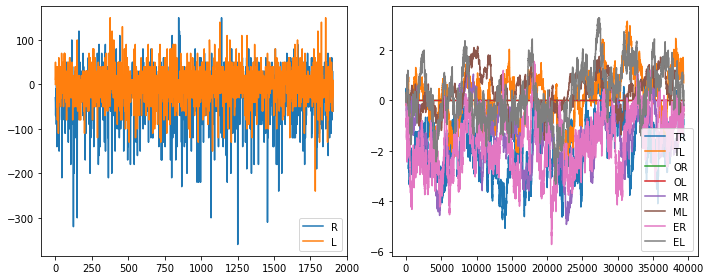

In [8]:
plot_algorithms(history, rewards)

## SARSA

In [9]:
from algorithms import sarsa

In [10]:
Q, history, rewards = sarsa(mdp, num_episodes=2000)

In [11]:
pd.DataFrame(Q).T

,R,L
T,-4.129053,-3.062894
O,0.000000,0.000000
M,-4.119558,-3.999943
E,-5.796376,-3.588436


In [12]:
show_q_learning(history)

,R,L
T,0,0
O,0,0
M,0,0
E,0,0


quit


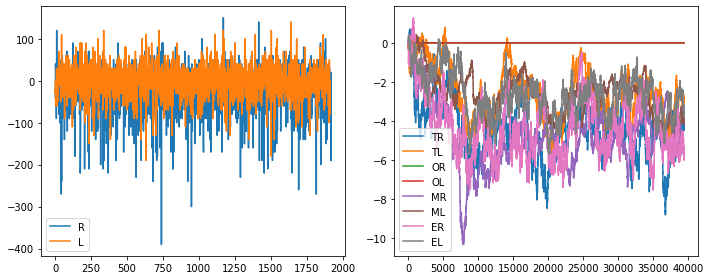

In [13]:
plot_algorithms(history, rewards)

## SARSA($\lambda$)

In [14]:
from algorithms import sarsa_lambda

In [15]:
Q, history, rewards = sarsa_lambda(mdp, num_episodes=2000)

In [16]:
pd.DataFrame(Q).T

,R,L
T,-3.752351,-2.516091
O,0.000000,0.000000
M,-7.256115,-3.203477
E,-5.885892,-5.195822


In [17]:
show_q_learning(history)

,R,L
T,0.805985,0.379510
O,0.000000,0.000000
M,-0.173114,0.206978
E,0.170305,0.299940


quit


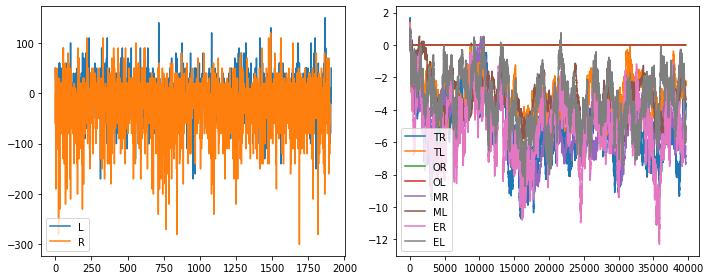

In [18]:
plot_algorithms(history, rewards)